In [1]:
import numpy as np
from PIL import Image
import seaborn as sn
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
label_mapping =   {0: 0, #"void"
  1: 0, #"dirt"
  3: 1, #"grass"
  4: 2 ,#"tree"
  5: 3, #"pole"
  6: 4, #"water"
  7: 0, #"sky"
  8: 5, #"vehicle"
  9: 0, #"object"
  10: 0, #"asphalt"
  12: 0, #"building"
  15: 6, #"log"
  17: 7, #"person"
  18: 8, #"fence"
  19: 9, #"bush"
  23: 10, #"concrete"
  27: 11, #"barrier"
  31: 12, #"puddle"
  33: 13, #"mud"
  34: 14} #"rubble"}

In [11]:
classname_list = ["void", "grass", "tree", "pole", "water", "vehicle",
                  "log", "person", "fence", "bush", "concrete", "barrier", "puddle", "mud", "rubble"]

In [12]:
def get_confusion_matrix(label, pred, size, num_class, ignore=-1):
    """
    Calcute the confusion matrix by given label and pred
    """
    seg_pred = pred.flatten().astype('int32')
    seg_gt = label.flatten().astype('int32')
    ignore_index = seg_gt != ignore
    seg_gt = seg_gt[ignore_index]
    seg_pred = seg_pred[ignore_index]
    index = (seg_gt * num_class + seg_pred).astype('int32')
    label_count = np.bincount(index)
    confusion_matrix = np.zeros((num_class, num_class))
    for i_label in range(num_class):
        for i_pred in range(num_class):
            cur_index = i_label * num_class + i_pred
            if cur_index < len(label_count):
                confusion_matrix[i_label,
                                 i_pred] = label_count[cur_index]
    
    return confusion_matrix

In [13]:
def convert_label(label, label_mapping, inverse=False):
    temp = label.copy()
    if inverse:
        for v, k in label_mapping.items():
            label[temp == k] = v
    else:
        for k, v in label_mapping.items():
            label[temp == k] = v
    return label

In [14]:
def plot_confusion_matrix(cm, classname_list):
    cm_sum = cm.sum(axis=1)
    cm_sum[cm_sum == 0] = 0.1

    cmn = cm/cm_sum[:, np.newaxis]
    #cmn = cm
    df_cm = pd.DataFrame(cmn, index=classname_list,
                         columns=classname_list)
    fig = plt.figure(figsize=(20, 14))
    sn.heatmap(df_cm, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [15]:
root = "/home/usl/Datasets/"
list_path = "pt_test.lst"
num_class = 15
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"salsa",img_path)
    label = np.fromfile(label_path,dtype=np.int32)
    label = label.reshape((-1,))
    label = convert_label(label, label_mapping)
    label_shape = label.shape
    pred = np.fromfile(pred_path,dtype=np.int32)
    pred = pred.reshape((-1,))
    pred = convert_label(pred, label_mapping)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,255)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.0416
processing: 100 images
mIoU: 0.1763
processing: 200 images
mIoU: 0.1568
processing: 300 images
mIoU: 0.1797
processing: 400 images
mIoU: 0.1783
processing: 500 images
mIoU: 0.1947
processing: 600 images
mIoU: 0.1977
processing: 700 images
mIoU: 0.1960
processing: 800 images
mIoU: 0.1934
processing: 900 images
mIoU: 0.1934
processing: 1000 images
mIoU: 0.1895
processing: 1100 images
mIoU: 0.1886
processing: 1200 images
mIoU: 0.1885
processing: 1300 images
mIoU: 0.1958
processing: 1400 images
mIoU: 0.2039
processing: 1500 images
mIoU: 0.1964
processing: 1600 images
mIoU: 0.1983
processing: 1700 images
mIoU: 0.2149
processing: 1800 images
mIoU: 0.2381
processing: 1900 images
mIoU: 0.2354
processing: 2000 images
mIoU: 0.2404
processing: 2100 images
mIoU: 0.2433
processing: 2200 images
mIoU: 0.2444
processing: 2300 images
mIoU: 0.2832
processing: 2400 images
mIoU: 0.2854
processing: 2500 images
mIoU: 0.2901
processing: 2600 images
mIoU: 0.2927
processing: 2

[0.         0.61757126 0.70775346 0.56242301 0.         0.2237123
 0.02366093 0.02971823 0.08240766 0.63673734 0.69197454 0.7581338
 0.21659105 0.08099814 0.00177931] 0.3088974022932204


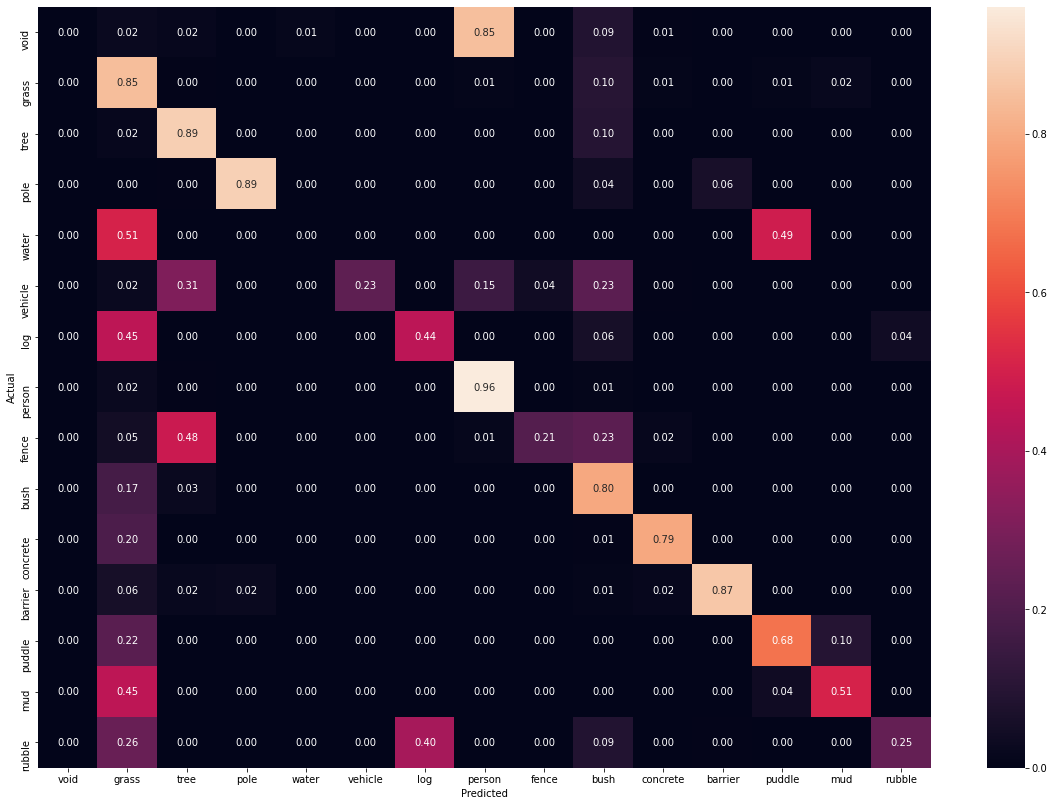

In [16]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean()    
print(IoU_array,mean_IoU)
plot_confusion_matrix(confusion_matrix,classname_list)

In [17]:
root = "/home/usl/Datasets/"
list_path = "pt_test.lst"
num_class = 15
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"kpconv",img_path)
    label = np.fromfile(label_path,dtype=np.int32)
    label = label.reshape((-1,))
    label = convert_label(label, label_mapping)
    label_shape = label.shape
    pred = np.fromfile(pred_path,dtype=np.int32)
    pred = pred.reshape((-1,))
    pred = convert_label(pred, label_mapping)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,255)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.0132
processing: 100 images
mIoU: 0.0683
processing: 200 images
mIoU: 0.0724
processing: 300 images
mIoU: 0.0843
processing: 400 images
mIoU: 0.0855
processing: 500 images
mIoU: 0.0938
processing: 600 images
mIoU: 0.1000
processing: 700 images
mIoU: 0.1005
processing: 800 images
mIoU: 0.1004
processing: 900 images
mIoU: 0.1020
processing: 1000 images
mIoU: 0.0998
processing: 1100 images
mIoU: 0.0984
processing: 1200 images
mIoU: 0.0977
processing: 1300 images
mIoU: 0.0979
processing: 1400 images
mIoU: 0.0982
processing: 1500 images
mIoU: 0.0994
processing: 1600 images
mIoU: 0.1021
processing: 1700 images
mIoU: 0.1045
processing: 1800 images
mIoU: 0.1066
processing: 1900 images
mIoU: 0.1085
processing: 2000 images
mIoU: 0.1103
processing: 2100 images
mIoU: 0.1116
processing: 2200 images
mIoU: 0.1124
processing: 2300 images
mIoU: 0.1136
processing: 2400 images
mIoU: 0.1151
processing: 2500 images
mIoU: 0.1155
processing: 2600 images
mIoU: 0.1156
processing: 2

[0.00104885 0.58763619 0.61467195 0.         0.         0.
 0.         0.35997803 0.         0.25628204 0.         0.00139775
 0.         0.         0.        ] 0.1214009867796675


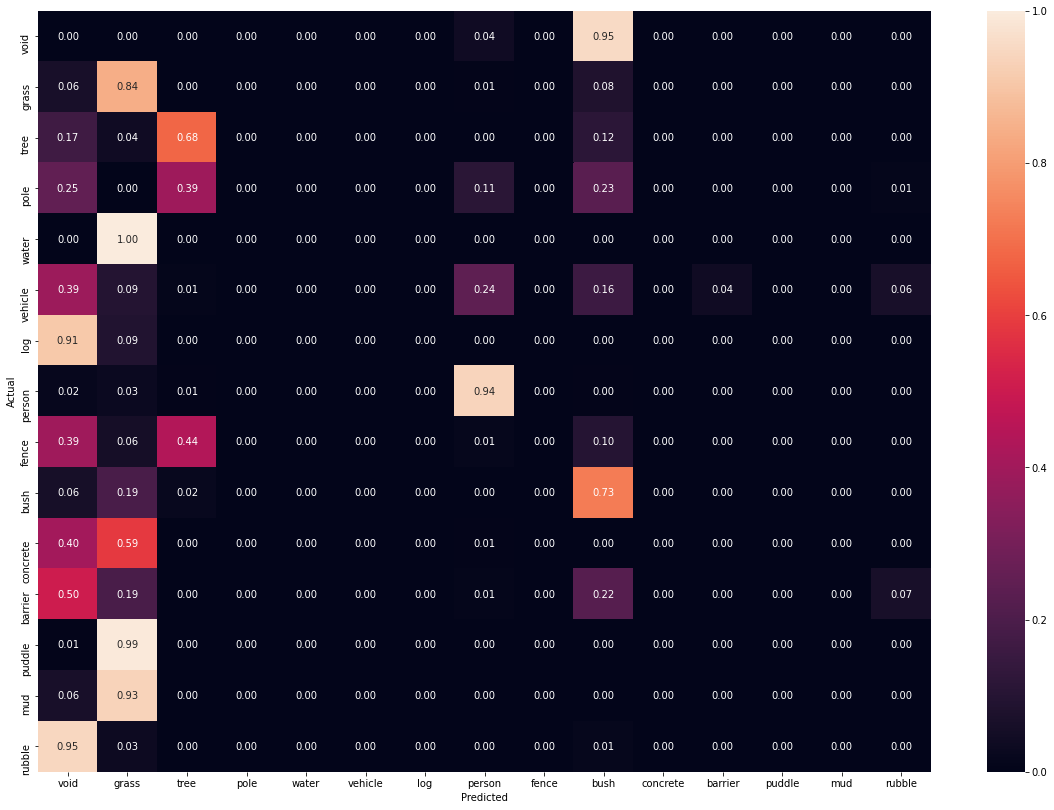

In [18]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean()    
print(IoU_array,mean_IoU)
plot_confusion_matrix(confusion_matrix,classname_list)